In [25]:
import pandas as pd
df1=pd.read_csv("/home/vamsi.srivathsa/pritam.k/sriman/part1_of_sa.csv")
df2=pd.read_csv("/home/vamsi.srivathsa/pritam.k/sriman/part2_of_sa.csv")
df3=pd.read_csv("/home/vamsi.srivathsa/pritam.k/sriman/part3_of_sa.csv")
df4=pd.read_csv("/home/vamsi.srivathsa/pritam.k/sriman/part4_of_sa.csv")

df5=pd.read_csv("/home/vamsi.srivathsa/sa_models_3_class_top_100_combined_with_prev_models.csv")

merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
merged_df.drop(columns=['Unnamed: 0'], inplace=True)

merged_500df=pd.concat([df5,merged_df],ignore_index=True)
df_models=merged_500df
df_models.tail()

,model,Ouput,_id,downloads,likes,architectures,datasets,language,metrics,pipeline_tag,lastModified,tags,#classes,is_sa,Source,scores
495,BeChi87/train_model_Lastest_16_8_lan3,"['POS', 'NEG', 'NEU']",64dce9195f21fb7f85a45ffa,3.0,0.0,['RobertaForSequenceClassification'],NaN,NaN,NaN,text-classification,2023-08-16T15:29:26.000Z,"['transformers', 'pytorch', 'tensorboard', 'ro...",3,y,NaN,NaN
496,madmancity/bert2,"['2', '1', '0']",6425067056027738f932d1f8,3.0,1.0,['BertForSequenceClassification'],['madmancity/autotrain-data-bert1'],['en'],NaN,text-classification,2023-03-30T04:01:08.000Z,"['transformers', 'pytorch', 'bert', 'text-clas...",3,y,NaN,NaN
497,sasha/autotrain-RobertaBaseTweetEval-1281048986,"['positive', 'neutral', 'negative']",62ff80a02979d8fc339ba1e4,3.0,0.0,['RobertaForSequenceClassification'],['sasha/autotrain-data-RobertaBaseTweetEval'],['unk'],NaN,text-classification,2022-08-19T12:28:24.000Z,"['transformers', 'pytorch', 'roberta', 'text-c...",3,y,NaN,NaN
498,yanezh/twiiter_try13_fold3,"['neutral', 'positive', 'negative']",647075741f0e7ee7fb1746fd,3.0,0.0,['BertForSequenceClassification'],NaN,NaN,NaN,text-classification,2023-05-26T09:31:45.000Z,"['transformers', 'pytorch', 'tensorboard', 'be...",3,y,NaN,NaN
499,Anwaarma/autotrain-testsen-65460136124,"['neutral', 'positive', 'negative']",64837a5f206a4ce1bc3eb129,3.0,0.0,['BertForSequenceClassification'],['Anwaarma/autotrain-data-testsen'],['unk'],NaN,text-classification,2023-06-09T19:16:32.000Z,"['transformers', 'pytorch', 'safetensors', 'be...",3,y,NaN,NaN


In [26]:
merged_500df.head()

,model,Ouput,_id,downloads,likes,architectures,datasets,language,metrics,pipeline_tag,lastModified,tags,#classes,is_sa,Source,scores
0,ProsusAI/finbert,"['neutral', 'positive', 'negative']",621ffdc036468d709f176f71,2737414.0,339.0,['BertForSequenceClassification'],NaN,en,NaN,text-classification,2023-05-23T12:43:35.000Z,"['transformers', 'pytorch', 'tf', 'jax', 'bert...",3,y,NaN,NaN
1,yiyanghkust/finbert-tone,"['Positive', 'Neutral', 'Negative']",621ffdc136468d709f181abd,2482264.0,99.0,['BertForSequenceClassification'],NaN,en,NaN,text-classification,2022-10-17T00:35:39.000Z,"['transformers', 'pytorch', 'tf', 'text-classi...",3,y,NaN,NaN
2,cardiffnlp/twitter-roberta-base-sentiment-latest,"['positive', 'neutral', 'negative']",622fea36174feb5439c2e4be,1264546.0,238.0,['RobertaForSequenceClassification'],['tweet_eval'],en,NaN,text-classification,2023-05-28T05:45:10.000Z,"['transformers', 'pytorch', 'tf', 'roberta', '...",3,y,Tweets Dataset,NaN
3,cardiffnlp/twitter-xlm-roberta-base-sentiment,"['positive', 'neutral', 'negative']",621ffdc136468d709f179e40,961859.0,138.0,['XLMRobertaForSequenceClassification'],NaN,multilingual,NaN,text-classification,2023-07-19T20:41:38.000Z,"['transformers', 'pytorch', 'tf', 'xlm-roberta...",3,y,Tweets Dataset,NaN
4,cardiffnlp/twitter-roberta-base-sentiment,"['LABEL_2', 'LABEL_1', 'LABEL_0']",621ffdc136468d709f179e37,918648.0,210.0,['RobertaForSequenceClassification'],['tweet_eval'],['en'],NaN,text-classification,2023-01-20T09:52:13.000Z,"['transformers', 'pytorch', 'tf', 'jax', 'robe...",3,y,Tweets Dataset,NaN


In [27]:
df_models['download_rank'] = df_models['downloads'].rank(ascending=False, method='min').astype(int)
df_models['like_rank'] = df_models['likes'].rank(ascending=False, method='min').astype(int)

df_models['lastModifiedDate'] = pd.to_datetime(df_models['lastModified'])
df_models['date_rank'] = df_models['lastModifiedDate'].rank(ascending=False, method='min').astype(int)

In [2]:
# import os
# import shutil

# src_dir_1 = "/home/vamsi.srivathsa/pritam.k/hf_audit/results_combined"
# src_dir_2 = "/home/vamsi.srivathsa/pritam.k/hf_audit/results_combined_p2"
# dest_dir = "/home/vamsi.srivathsa/pritam.k/hf_audit/results_combined_500"

# os.makedirs(dest_dir, exist_ok=True)

# for dataset in ["financial_phrasebank", "amazon_multi_reviews"]:
#     dest_dataset_dir = os.path.join(dest_dir, dataset)
#     os.makedirs(dest_dataset_dir, exist_ok=True)

#     dest_before_dir = os.path.join(dest_dataset_dir, "after")
#     os.makedirs(dest_before_dir, exist_ok=True)

#     for difficulty in ["easy", "ambi", "hard"]:
#         dest_difficulty_dir = os.path.join(dest_before_dir, difficulty)
#         os.makedirs(dest_difficulty_dir, exist_ok=True)

#         src_difficulty_dir_1 = os.path.join(src_dir_1, dataset, "after", difficulty)
#         for filename in os.listdir(src_difficulty_dir_1):
#             src_file = os.path.join(src_difficulty_dir_1, filename)
#             dest_file = os.path.join(dest_difficulty_dir, filename)
#             shutil.copy(src_file, dest_file)

#         src_difficulty_dir_2 = os.path.join(src_dir_2, dataset, "after", difficulty)
#         for filename in os.listdir(src_difficulty_dir_2):
#             src_file = os.path.join(src_difficulty_dir_2, filename)
#             dest_file = os.path.join(dest_difficulty_dir, filename)
#             shutil.copy(src_file, dest_file)

In [28]:
import os
import json

def returnDF(dataset, category):
    df_models_sorted = df_models.sort_values('downloads', ascending=False)
    df_models_sorted['mname'] = [f'M'+str(i+1) for i in range(500)]
    path=f"./pritam.k/hf_audit/results_combined_500/{dataset}/after/{category}/"

    easy_cart_fnames = os.listdir(path)

    data=[]
    for fname in df_models_sorted.model:
        tname = fname.replace("/", "_")
        final_name = tname+'_scores.json'
        if final_name in easy_cart_fnames:
            with open(path+final_name, "r") as jfile:
                score_data = json.load(jfile)
                score_data["model"] = fname
                data.append(score_data)

    df_scores_easy_cart = pd.DataFrame(data)
    df_scores_easy_cart['f1_rank'] = df_scores_easy_cart['test_f1'].rank(ascending=False, method='min').astype(int)
    merged_df = pd.merge(df_scores_easy_cart, df_models_sorted, on='model', how='inner')
    return merged_df


def returnDF_before(dataset, category):
    df_models_sorted = df_models.sort_values('downloads', ascending=False)
    df_models_sorted['mname'] = [f'M'+str(i+1) for i in range(500)]
    path=f"./pritam.k/hf_audit/results_combined_500/{dataset}/before/{category}/"

    easy_cart_fnames = os.listdir(path)

    data=[]
    for fname in df_models_sorted.model:
        tname = fname.replace("/", "_")
        final_name = tname+'_scores.json'
        if final_name in easy_cart_fnames:
            with open(path+final_name, "r") as jfile:
                score_data = json.load(jfile)
                score_data["model"] = fname
                data.append(score_data)

    df_scores_easy_cart = pd.DataFrame(data)
    df_scores_easy_cart['f1_rank'] = df_scores_easy_cart['f1'].rank(ascending=False, method='min').astype(int)
    merged_df = pd.merge(df_scores_easy_cart, df_models_sorted, on='model', how='inner')
    return merged_df

In [33]:
df_perf1 = returnDF_before("tweet_eval", "easy")
df_perf2 = returnDF_before("tweet_eval", "ambi")
df_perf3 = returnDF_before("tweet_eval", "hard")
df_perf1 = df_perf1.sort_values(by='f1', ascending=False)
df_perf2 = df_perf2.sort_values(by='f1', ascending=False)
df_perf3 = df_perf3.sort_values(by='f1', ascending=False)
df_perfs = [df_perf1, df_perf2, df_perf3]


highlighted_models=['cardiffnlp/twitter-roberta-base-sentiment-latest',
 'cardiffnlp/twitter-roberta-base-sentiment',
 'amansolanki/autonlp-Tweet-Sentiment-Extraction-20114061',
 'finiteautomata/beto-sentiment-analysis',
 'finiteautomata/bertweet-base-sentiment-analysis',
 'cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual',
 'cardiffnlp/twitter-roberta-base-dec2021-sentiment',
 'cardiffnlp/twitter-roberta-base-2021-124m-sentiment',
 'cardiffnlp/xlm-roberta-base-sentiment-multilingual',
 'bardsai/twitter-sentiment-pl-base',
 'cardiffnlp/bert-base-multilingual-cased-sentiment-multilingual',
 'cardiffnlp/roberta-base-sentiment',
 'Timothy1337/finetuning-sentiment-all_df',
 'elozano/tweet_sentiment_eval',
 'Kapiche/twitter-roberta-base-sentiment-latest',
 'bardsai/twitter-sentiment-pl-fast',
 'sasha/autotrain-BERTBase-TweetEval-1281248996',
 'sasha/autotrain-RobertaBaseTweetEval-1281048990',
 'sasha/autotrain-BERTBase-TweetEval-1281248998',
 'sasha/autotrain-DistilBERT-TweetEval-1281148991',
 'aXhyra/presentation_sentiment_1234567',
 'sasha/autotrain-RobertaBaseTweetEval-1281048989',
 'sasha/autotrain-DistilBERT-TweetEval-1281148992',
 'sasha/autotrain-RobertaBaseTweetEval-1281048986']

# highlighted_models=[]

print("tweet_eval_before")
from scipy.stats import spearmanr
def corr(list1, list2):
    correlation, pvalue = spearmanr(list1, list2)
    return correlation,pvalue
for j,df_perf in enumerate(df_perfs):
    in_domain_down_rank_list=[]
    in_domain_f1_rank_list=[]
    in_domain_like_rank_list=[]
    in_domain_date_rank_list=[]
    out_domain_down_rank_list=[]
    out_domain_f1_rank_list=[]
    out_domain_like_rank_list=[]
    out_domain_date_rank_list=[]
    
    for i, (model, download_rank, like_rank, date_rank, f1_rank) in enumerate(zip(df_perf['model'], df_perf['download_rank'], df_perf['like_rank'], df_perf['date_rank'], df_perf['f1_rank'])):
        if model in highlighted_models:
            in_domain_down_rank_list.append(download_rank)
            in_domain_like_rank_list.append(like_rank)
            in_domain_date_rank_list.append(date_rank)  
            in_domain_f1_rank_list.append(f1_rank)  
        else:
            out_domain_down_rank_list.append(download_rank)
            out_domain_like_rank_list.append(like_rank)
            out_domain_date_rank_list.append(date_rank)  
            out_domain_f1_rank_list.append(f1_rank)
    if j==0:
        print("Easy")   
    if j==1:
        print("Ambi")
    if j==2:
        print("Hard")
    print("in-domain")
    print("down_rank",end="\t")
    print(corr(in_domain_down_rank_list, in_domain_f1_rank_list))
    print("like_rank",end="\t")
    print(corr(in_domain_like_rank_list, in_domain_f1_rank_list))
    print("date_rank",end="\t")
    print(corr(in_domain_date_rank_list, in_domain_f1_rank_list))
    print("out-domain")
    print("down_rank",end="\t")
    print(corr(out_domain_down_rank_list, out_domain_f1_rank_list))
    print("like_rank",end="\t")
    print(corr(out_domain_like_rank_list, out_domain_f1_rank_list))
    print("date_rank",end="\t")
    print(corr(out_domain_date_rank_list, out_domain_f1_rank_list))

            

tweet_eval_before
Easy
in-domain
down_rank	(0.058451707142282996, 0.7861611723983704)
like_rank	(-0.03525003961754598, 0.8701084035589652)
date_rank	(0.10567514926917308, 0.6231127937692269)
out-domain
down_rank	(0.21478978170605428, 5.472294131220644e-06)
like_rank	(0.15917186235370398, 0.000806059424121304)
date_rank	(-0.09850283990838114, 0.03888889854696063)
Ambi
in-domain
down_rank	(0.2351154488782876, 0.2687566241430994)
like_rank	(0.05080867779356628, 0.8136074013610013)
date_rank	(0.1465536020728861, 0.494392290647222)
out-domain
down_rank	(0.18675961799310395, 8.265085692858307e-05)
like_rank	(0.1208667451162889, 0.01126023560250923)
date_rank	(-0.08997229832412934, 0.059622359328695675)
Hard
in-domain
down_rank	(0.2717568175346441, 0.19893286526645196)
like_rank	(0.2506399368668269, 0.23748204602476986)
date_rank	(0.15351163659266706, 0.4738892536737256)
out-domain
down_rank	(0.057136068183602756, 0.2316714824050864)
like_rank	(0.07734796404942507, 0.105172704475422)
date_ran

In [5]:
highlighted_models_tweet=['cardiffnlp/twitter-roberta-base-sentiment-latest',
 'cardiffnlp/twitter-roberta-base-sentiment',
 'amansolanki/autonlp-Tweet-Sentiment-Extraction-20114061',
 'finiteautomata/beto-sentiment-analysis',
 'finiteautomata/bertweet-base-sentiment-analysis',
 'cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual',
 'cardiffnlp/twitter-roberta-base-dec2021-sentiment',
 'cardiffnlp/twitter-roberta-base-2021-124m-sentiment',
 'cardiffnlp/xlm-roberta-base-sentiment-multilingual',
 'bardsai/twitter-sentiment-pl-base',
 'cardiffnlp/bert-base-multilingual-cased-sentiment-multilingual',
 'cardiffnlp/roberta-base-sentiment',
 'Timothy1337/finetuning-sentiment-all_df',
 'elozano/tweet_sentiment_eval',
 'Kapiche/twitter-roberta-base-sentiment-latest',
 'bardsai/twitter-sentiment-pl-fast',
 'sasha/autotrain-BERTBase-TweetEval-1281248996',
 'sasha/autotrain-RobertaBaseTweetEval-1281048990',
 'sasha/autotrain-BERTBase-TweetEval-1281248998',
 'sasha/autotrain-DistilBERT-TweetEval-1281148991',
 'aXhyra/presentation_sentiment_1234567',
 'sasha/autotrain-RobertaBaseTweetEval-1281048989',
 'sasha/autotrain-DistilBERT-TweetEval-1281148992',
 'sasha/autotrain-RobertaBaseTweetEval-1281048986']

highlighted_models_amazon= ['philschmid/distilbert-base-multilingual-cased-sentiment-2',
  'poom-sci/WangchanBERTa-finetuned-sentiment',
  'blanchefort/rubert-base-cased-sentiment-rurewiews',
  'christian-phu/bert-finetuned-japanese-sentiment',
  'philschmid/distilbert-base-multilingual-cased-sentiment-2',
  'Voicelab/herbert-base-cased-sentiment',
  'RashidNLP/Amazon-Deberta-Base-Sentiment',
  'arjuntheprogrammer/distilbert-base-multilingual-cased-sentiment-2']

highlighted_models_financial= ['mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis',
 'ahmedrachid/FinancialBERT-Sentiment-Analysis',
 'soleimanian/financial-roberta-large-sentiment',
 'Sigma/financial-sentiment-analysis',
 'hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2',
 'Jean-Baptiste/roberta-large-financial-news-sentiment-en',
 'FinanceInc/auditor_sentiment_finetuned',
 'bardsai/finance-sentiment-zh-base',
 'RashidNLP/Finance-Sentiment-Classification',
 'bardsai/finance-sentiment-zh-fast',
 'mrfakename/distilroberta-financial-news-tweets-sentiment-analysis',
 'bardsai/finance-sentiment-pl-fast',
 'nickwong64/bert-base-uncased-finance-sentiment',
 'IngeniousArtist/distilbert-finance',
 'bardsai/finance-sentiment-pl-base',
 'warwickai/fin-perceiver',
 'langecod/Financial_Phrasebank_RoBERTa',
 'santis2/phrasebank-sentiment-analysis',
 'bardsai/finance-sentiment-de-base',
 'bardsai/finance-sentiment-ja-base',
 'oandreae/financial_sentiment_model',
 'nuriafari/my_model',
 'bekbote/autotrain-dl-phrasebank-53436126044',
 'bardsai/finance-sentiment-es-base']

print(len(highlighted_models_tweet))
print(len(highlighted_models_amazon))
print(len(highlighted_models_financial))

24
8
24


In [35]:
df_perf1 = returnDF_before("amazon_multi_reviews", "easy")
df_perf2 = returnDF_before("amazon_multi_reviews", "ambi")
df_perf3 = returnDF_before("amazon_multi_reviews", "hard")
df_perf1 = df_perf1.sort_values(by='f1', ascending=False)
df_perf2 = df_perf2.sort_values(by='f1', ascending=False)
df_perf3 = df_perf3.sort_values(by='f1', ascending=False)
df_perfs = [df_perf1, df_perf2, df_perf3]


highlighted_models= ['philschmid/distilbert-base-multilingual-cased-sentiment-2',
  'poom-sci/WangchanBERTa-finetuned-sentiment',
  'blanchefort/rubert-base-cased-sentiment-rurewiews',
  'christian-phu/bert-finetuned-japanese-sentiment',
  'philschmid/distilbert-base-multilingual-cased-sentiment-2',
  'Voicelab/herbert-base-cased-sentiment',
  'RashidNLP/Amazon-Deberta-Base-Sentiment',
  'arjuntheprogrammer/distilbert-base-multilingual-cased-sentiment-2']

# highlighted_models=[]

print("amazon_multi_reviews_before")
from scipy.stats import spearmanr
def corr(list1, list2):
    correlation, pvalue = spearmanr(list1, list2)
    return correlation, pvalue
for j,df_perf in enumerate(df_perfs):
    in_domain_down_rank_list=[]
    in_domain_f1_rank_list=[]
    in_domain_like_rank_list=[]
    in_domain_date_rank_list=[]
    out_domain_down_rank_list=[]
    out_domain_f1_rank_list=[]
    out_domain_like_rank_list=[]
    out_domain_date_rank_list=[]
    
    for i, (model, download_rank, like_rank, date_rank, f1_rank) in enumerate(zip(df_perf['model'], df_perf['download_rank'], df_perf['like_rank'], df_perf['date_rank'], df_perf['f1_rank'])):
        if model in highlighted_models:
            in_domain_down_rank_list.append(download_rank)
            in_domain_like_rank_list.append(like_rank)
            in_domain_date_rank_list.append(date_rank)  
            in_domain_f1_rank_list.append(f1_rank)  
        else:
            out_domain_down_rank_list.append(download_rank)
            out_domain_like_rank_list.append(like_rank)
            out_domain_date_rank_list.append(date_rank)  
            out_domain_f1_rank_list.append(f1_rank)
    if j==0:
        print("Easy")   
    if j==1:
        print("Ambi")
    if j==2:
        print("Hard")
    print("in-domain")
    print("down_rank",end="\t")
    print(corr(in_domain_down_rank_list, in_domain_f1_rank_list))
    print("like_rank",end="\t")
    print(corr(in_domain_like_rank_list, in_domain_f1_rank_list))
    print("date_rank",end="\t")
    print(corr(in_domain_date_rank_list, in_domain_f1_rank_list))
    print("out-domain")
    print("down_rank",end="\t")
    print(corr(out_domain_down_rank_list, out_domain_f1_rank_list))
    print("like_rank",end="\t")
    print(corr(out_domain_like_rank_list, out_domain_f1_rank_list))
    print("date_rank",end="\t")
    print(corr(out_domain_date_rank_list, out_domain_f1_rank_list))

            

amazon_multi_reviews_before
Easy
in-domain
down_rank	(-0.7142857142857144, 0.07134356146753759)
like_rank	(-0.8829187134416479, 0.008450342381896611)
date_rank	(0.1785714285714286, 0.7016579425162729)
out-domain
down_rank	(0.21736160858494175, 2.9449645022519757e-06)
like_rank	(0.13997364098714551, 0.002799263918966083)
date_rank	(-0.08391091883068975, 0.074077354579365)
Ambi
in-domain
down_rank	(-0.7142857142857144, 0.07134356146753759)
like_rank	(-0.8829187134416479, 0.008450342381896611)
date_rank	(0.1785714285714286, 0.7016579425162729)
out-domain
down_rank	(0.18851147217752895, 5.5086725628142785e-05)
like_rank	(0.1538161580978671, 0.0010356262711251757)
date_rank	(-0.08112324573816912, 0.08493039772294843)
Hard
in-domain
down_rank	(-0.642857142857143, 0.11939237342741094)
like_rank	(-0.2702812388086677, 0.5577307488053698)
date_rank	(0.39285714285714296, 0.38331687042697266)
out-domain
down_rank	(0.1625353396946313, 0.0005222538462792668)
like_rank	(0.1736912673435421, 0.00020665

In [41]:
df_perf1 = returnDF("financial_phrasebank", "easy")
df_perf1 = df_perf1.sort_values(by='test_f1', ascending=False)

highlighted_models= ['mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis',
 'ahmedrachid/FinancialBERT-Sentiment-Analysis',
 'soleimanian/financial-roberta-large-sentiment',
 'Sigma/financial-sentiment-analysis',
 'hw2942/bert-base-chinese-finetuning-financial-news-sentiment-v2',
 'Jean-Baptiste/roberta-large-financial-news-sentiment-en',
 'FinanceInc/auditor_sentiment_finetuned',
 'bardsai/finance-sentiment-zh-base',
 'RashidNLP/Finance-Sentiment-Classification',
 'bardsai/finance-sentiment-zh-fast',
 'mrfakename/distilroberta-financial-news-tweets-sentiment-analysis',
 'bardsai/finance-sentiment-pl-fast',
 'nickwong64/bert-base-uncased-finance-sentiment',
 'IngeniousArtist/distilbert-finance',
 'bardsai/finance-sentiment-pl-base',
 'warwickai/fin-perceiver',
 'langecod/Financial_Phrasebank_RoBERTa',
 'santis2/phrasebank-sentiment-analysis',
 'bardsai/finance-sentiment-de-base',
 'bardsai/finance-sentiment-ja-base',
 'oandreae/financial_sentiment_model',
 'nuriafari/my_model',
 'bekbote/autotrain-dl-phrasebank-53436126044',
 'bardsai/finance-sentiment-es-base']

# highlighted_models=[]

print("financial_phrasebank_after")
from scipy.stats import spearmanr
def corr(list1, list2):
    correlation, pvalue = spearmanr(list1, list2)
    return correlation, pvalue

in_domain_down_rank_list=[]
in_domain_f1_rank_list=[]
in_domain_like_rank_list=[]
in_domain_date_rank_list=[]
out_domain_down_rank_list=[]
out_domain_f1_rank_list=[]
out_domain_like_rank_list=[]
out_domain_date_rank_list=[]
    
for i, (model, download_rank, like_rank, date_rank, f1_rank) in enumerate(zip(df_perf1['model'], df_perf1['download_rank'], df_perf1['like_rank'], df_perf1['date_rank'], df_perf1['f1_rank'])):
    if model in highlighted_models:
        in_domain_down_rank_list.append(download_rank)
        in_domain_like_rank_list.append(like_rank)
        in_domain_date_rank_list.append(date_rank)  
        in_domain_f1_rank_list.append(f1_rank)  
    else:
        out_domain_down_rank_list.append(download_rank)
        out_domain_like_rank_list.append(like_rank)
        out_domain_date_rank_list.append(date_rank)  
        out_domain_f1_rank_list.append(f1_rank)
    if i==0:
        print("Easy")   
print("in-domain")
print("down_rank",end="\t")
print(corr(in_domain_down_rank_list, in_domain_f1_rank_list))
print("like_rank",end="\t")
print(corr(in_domain_like_rank_list, in_domain_f1_rank_list))
print("date_rank",end="\t")
print(corr(in_domain_date_rank_list, in_domain_f1_rank_list))
print("out-domain")
print("down_rank",end="\t")
print(corr(out_domain_down_rank_list, out_domain_f1_rank_list))
print("like_rank",end="\t")
print(corr(out_domain_like_rank_list, out_domain_f1_rank_list))
print("date_rank",end="\t")
print(corr(out_domain_date_rank_list, out_domain_f1_rank_list))
            

financial_phrasebank_after
Easy
in-domain
down_rank	(0.26858946825389646, 0.22680763546150134)
like_rank	(0.26304713531923896, 0.23690708951961081)
date_rank	(-0.4330886504799548, 0.044075426333464576)
out-domain
down_rank	(-0.09828856301307537, 0.04309265288929168)
like_rank	(-0.1280550810949491, 0.008292852433144541)
date_rank	(0.009445160575309352, 0.8462401407198379)


FINAL PLOTS

In [ ]:
import os
import pandas as pd
import numpy as np

# Define the root directory where the files are located
root_dir = "/home/vamsi.srivathsa/pritam.k/sriman/100-500_annotations"

# Define the names of the people
people = ["agnish", "soumavo", "rudranshu", "sayani"]

# Loop through each person
for person in people:
    # Initialize empty dataframes for each type of data
    model_details = pd.DataFrame()
    training_details = pd.DataFrame()
    evaluation_details = pd.DataFrame()
    other_details = pd.DataFrame()
    uses_details = pd.DataFrame()

    # Loop through the different ranges (100-200, 200-300, ...)
    for range_start in range(100, 501, 100):
        range_end = range_start + 100

        # Construct the directory path for the current range
        # dir_path = os.path.join(root_dir, f"{range_start}-{range_end}_models_{person}")
        dir_path=root_dir
        # Check if the directory exists
        if os.path.isdir(dir_path):
            # Construct the file paths for the current range
            model_details_file = os.path.join(dir_path, f"{range_start}-{range_end}_models_{person} - Model Details.csv")
            training_details_file = os.path.join(dir_path, f"{range_start}-{range_end}_models_{person} - Training Details.csv")
            evaluation_details_file = os.path.join(dir_path, f"{range_start}-{range_end}_models_{person} - Evaluation.csv")
            other_details_file = os.path.join(dir_path, f"{range_start}-{range_end}_models_{person} - Other Details.csv")
            uses_details_file = os.path.join(dir_path, f"{range_start}-{range_end}_models_{person} - Uses.csv")

            # Load the data into the respective dataframes
            if os.path.isfile(model_details_file):
                temp=pd.read_csv(model_details_file)
                print(temp.head())
                temp=temp.drop('Unnamed: 8', axis=1)
                temp.columns=temp.iloc[0]
                temp=temp.rename(columns={np.nan:"Model Name"})
                temp=temp.drop(temp.index[0])                           
                model_details = pd.concat([model_details, temp], ignore_index=True)


            if os.path.isfile(training_details_file):
                training_details = pd.concat([training_details, pd.read_csv(training_details_file)], ignore_index=True)

            if os.path.isfile(evaluation_details_file):
                evaluation_details = pd.concat([evaluation_details, pd.read_csv(evaluation_details_file)], ignore_index=True)

            if os.path.isfile(other_details_file):
                other_details = pd.concat([other_details, pd.read_csv(other_details_file)], ignore_index=True)

            if os.path.isfile(uses_details_file):
                uses_details = pd.concat([uses_details, pd.read_csv(uses_details_file)], ignore_index=True)

    # Concatenate all the dataframes into a single dataframe
    combined_data = pd.concat([model_details, training_details, evaluation_details, other_details, uses_details], axis=1, keys=["Model Details", "Training Details", "Evaluation Details", "Other Details", "Uses Details"])

    # Clean up the column names
    column_tuples = combined_data.columns.to_list()
    column_names = [t[1] for t in column_tuples]
    combined_data.columns = column_names

    # Remove duplicate columns
    combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

    # Drop the 'Comments' column if present
    if 'Comments' in combined_data.columns:
        combined_data = combined_data.drop(columns=['Comments'])

    # Save the combined dataframe as a CSV file
    output_file = os.path.join("/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined", f"combined_data_{person}.csv")
    combined_data.to_csv(output_file, index=False)

In [37]:
df1=pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_soumavo.csv')
columns=df1.columns.to_list()
print(columns)

['Model Name', 'Developed by', 'Funded by [optional]', 'Shared by [optional]', 'Model type', 'Language(s) (NLP)', 'License', 'Finetuned from model [optional]', 'Repository', 'Paper [optional]', 'Demo [optional]', 'Label Information', 'Training Data', 'Training Procedure', 'Preprocessing [optional]', 'Training Hyperparameters', 'Speeds, Sizes, Times [optional]', 'Testing Data', 'Factors', 'Metrics', 'Results', 'Summary', 'Model Examination [optional]', 'Environmental Impact', 'Technical Specifications [optional]', 'Model Architecture and Objective', 'Compute Infrastructure', 'Hardware', 'Software', 'Citation [optional]', 'Glossary [optional]', 'More Information [optional]', 'Model Card Authors [optional]', 'Model Card Contact', 'Direct Use', 'Downstream Use [optional]', 'Out-of-Scope Use', 'Bias, Risks, and Limitations', 'Recommendations', 'How to Get Started with the Model']


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1=pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_agnish.csv')
df1=df1.drop('Unnamed: 13', axis=1)
df2=pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_rudranshu.csv')
df3=pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_sayani.csv')
df4=pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_soumavo.csv')


df1.set_index('Model Name', inplace=True)
df2.set_index('Model Name', inplace=True)
df3.set_index('Model Name', inplace=True)
df4.set_index('Model Name', inplace=True)


annotation_majorityvote = pd.DataFrame(index=df2.index)

## annotation_majorityvote by calculating majotity vote of the annotations done by three annotatotrs

for col in df1.columns:
    for model in annotation_majorityvote.index:
        votes = [df1.loc[model, col], df2.loc[model, col], df3.loc[model, col], df4.loc[model, col]]
        majority_vote = max(set(votes), key=votes.count) if votes.count(max(set(votes), key=votes.count)) >= 3 else 'U'
        annotation_majorityvote.loc[model, col] = majority_vote

annotation_majorityvote.to_csv('Combined_annotations/annotation_majorityvote_100-500.csv')

## Now we want a dataframe which consists of information of only mandatory details of the model card

columns_to_drop = [1, 2, 6, 8, 9, 10, 13, 15, 22, 27, 29, 34, 35, 36, 37] ##This is written by manually checking the csv sheet


annotation_majorityvote_mand = annotation_majorityvote.drop(annotation_majorityvote.columns[columns_to_drop], axis=1)

percentage_df = annotation_majorityvote_mand.T.apply(lambda x: x.value_counts(normalize=True) * 100)

## calculating the percentage of FIA, PIA, NIA, U for all models 
percentage_df=percentage_df.T
percentage_df.fillna(0, inplace=True)
percentage_df.drop(percentage_df.index[-1], inplace=True)

percentage_df.to_csv('Combined_annotations/percentage_mand.csv')




## now we want dataframes for each of section of model card informations, sections include model details, training details, etc
### In plotting these pie charts we use all information, not just mandatory

new_annotation_all=pd.read_csv('Combined_annotations/annotation-majorityvote_all - annotation_majorityvote.csv')

split_indices = [12, 17, 22, 28]  ## written manually after checking the csv file 
divided_dfs = []

for i in range(len(split_indices) + 1):
    start_index = 0 if i == 0 else split_indices[i - 1]
    end_index = split_indices[i] if i < len(split_indices) else None
    selected_columns = new_annotation_all.columns[start_index:end_index]
    divided_df = new_annotation_all[selected_columns].copy()
    divided_dfs.append(divided_df)

divided_dfs[0]=divided_dfs[0].drop(columns=['Model Name'])
model_details_counts=divided_dfs[0].apply(lambda x: pd.Series(x).value_counts())
training_details_count=divided_dfs[1].apply(lambda x: pd.Series(x).value_counts())
evaluation_details_count=divided_dfs[2].apply(lambda x: pd.Series(x).value_counts())
uses_details_count=divided_dfs[3].apply(lambda x: pd.Series(x).value_counts())
other_details_count=divided_dfs[4].apply(lambda x: pd.Series(x).value_counts())


other_details_count['Total_counts']=other_details_count.sum(axis=1)
uses_details_count['Total_counts']=uses_details_count.sum(axis=1)
model_details_counts['Total_counts']=model_details_counts.sum(axis=1)
training_details_count['Total_counts']=training_details_count.sum(axis=1)
evaluation_details_count['Total_counts']=evaluation_details_count.sum(axis=1)



#######
## * This below part is used for labelling the percentages for the plot

model_details_counts.index=['34.73%','51.91%','10.18%','3.18%']
training_details_count.index=['19.00%','61.40%','15.60%','4.00%']
evaluation_details_count.index=['22.00%','58.60%','17.80%','1.60%']
uses_details_count.index=['20.83%','71.17%','5.17%','2.83%']
other_details_count.index=['4.08%','87.83%','6.08%','2.00%']

#######3


## the below code is for plotting pie charts for each section 

k='Total_counts'

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)

colors=['white']*5

explode=(0,0,0,0.2)

hatches= ['//', 'xx', '\\\\', '++']

model_details_counts.plot.pie(ax=ax1, y=k, colors=colors,hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True},title= 'Model Details',fontsize=21,textprops={'color' : 'black'})
training_details_count.plot.pie(ax=ax2, y=k, colors=colors,hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True}, title= 'Training Details', fontsize=21,textprops={'color':'black'})
evaluation_details_count.plot.pie(ax=ax3, y=k, colors=colors, hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True},title = 'Evaluation Details',  fontsize=21,textprops={'color':'black'})
uses_details_count.plot.pie(ax=ax4, y=k, colors=colors, hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True},title ='Uses', fontsize=21,textprops={'color':'black'})
other_details_count.plot.pie(ax=ax5, y=k, colors=colors, hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True},title= 'Other Details',  fontsize=21, textprops={'color':'black'})

ax1.set_ylabel('')
ax1.set_title('Model Details', fontsize=29)
ax2.set_ylabel('')
ax2.set_title('Training Details', fontsize=29)
ax3.set_ylabel('')
ax3.set_title('Evaluation Details', fontsize=29)
ax4.set_title('Uses', fontsize=29)
ax5.set_title('Other Details', fontsize=29)
ax4.set_ylabel('')
ax5.set_ylabel('')
plt.tight_layout()
# plt.savefig("plots/manual_inspection_vbw2.pdf", dpi=300)

ax1.legend(['FIA','NIA','PIA','U'], loc='lower right', bbox_to_anchor=(4, -1.2), prop={'size':28})
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax4.legend().set_visible(False)
ax5.legend().set_visible(False)


plt.show()



TypeError: unhashable type: 'Series'

In [1]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_agnish.csv')
df1=df1.drop('Unnamed: 13', axis=1)
df2 = pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_rudranshu.csv')
df3 = pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_sayani.csv')
df4 = pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_soumavo.csv')

# Set the index to 'Model Name'
df1 = df1.set_index('Model Name')
df2 = df2.set_index('Model Name')
df3 = df3.set_index('Model Name')
df4 = df4.set_index('Model Name')

# Find the common index across all dataframes
common_index = df1.index.intersection(df2.index).intersection(df3.index).intersection(df4.index)

# Create a new DataFrame with the common index
annotation_majorityvote = pd.DataFrame(index=common_index, columns=df1.columns)

# Calculate the majority vote for each column
for col in df1.columns:
    for model in common_index:
        votes = [df1.loc[model, col], df2.loc[model, col], df3.loc[model, col], df4.loc[model, col]]
        majority_vote = max(set(votes), key=votes.count) if  votes.count(max(set(votes), key=votes.count)) >= 3 else 'U'
        annotation_majorityvote.loc[model, col] = majority_vote

# Save the result to a CSV file
annotation_majorityvote.to_csv('/home/vamsi.srivathsa/pritam.k/Combined_annotations/annotation_majorityvote_100-500.csv')
# annotation_majorityvote.head()

/home/vamsi.srivathsa/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [19]:
pip install krippendorff

Note: you may need to restart the kernel to use updated packages.


In [39]:
# df2.head()# Read the CSV files
import pandas as pd
df1 = pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_agnish.csv')
df1=df1.drop('Unnamed: 13', axis=1)
df2 = pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_rudranshu.csv')
df3 = pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_sayani.csv')
df4 = pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/100_500_combined/combined_data_soumavo.csv')

df1 = df1.drop(columns=['Model Name'])
df2 = df2.drop(columns=['Model Name'])
df3 = df3.drop(columns=['Model Name'])
df4 = df4.drop(columns=['Model Name'])

# combined_df = pd.concat([df1, df2, df3, df4], axis=0).reset_index(drop=True)
# combined_df = combined_df.apply(lambda x: pd.factorize(x)[0])

# combined_df.head()


In [51]:
import krippendorff
flattened_df1 = pd.DataFrame(df1.values.flatten(), columns=['Annotator1'])
flattened_df2 = pd.DataFrame(df2.values.flatten(), columns=['Annotator2'])
flattened_df3 = pd.DataFrame(df3.values.flatten(), columns=['Annotator3'])
flattened_df4 = pd.DataFrame(df4.values.flatten(), columns=['Annotator4'])

# Combine the flattened DataFrames into a single DataFrame
combined_df = pd.concat([flattened_df1, flattened_df2, flattened_df3, flattened_df4], axis=1)

# Convert the combined DataFrame to numerical values using factorize
combined_df = combined_df.apply(lambda x: pd.factorize(x)[0])

# Transpose the DataFrame to have documents as rows and annotators as columns
data_matrix = combined_df.values.T

# Check if there's more than one unique value in the combined data
if len(set(data_matrix.flatten())) > 1:
    # Calculate Krippendorff's alpha
    alpha = krippendorff.alpha(data_matrix, level_of_measurement='nominal')
else:
    alpha = None  # or some placeholder indicating no variability

# Print the Krippendorff's alpha result
print(f"Krippendorff's alpha: {alpha}")


Krippendorff's alpha: -0.1991117777733511


In [56]:
# combined_df.value_counts
# combined_df.describe()
boolean_df = combined_df.applymap(lambda x: x == -1)

# Sum the boolean DataFrame to get the count of -1 values
count_minus_one = boolean_df.sum().sum()

print(f"Total count of -1 in combined_df: {count_minus_one}")

Total count of -1 in combined_df: 52


/tmp/ipykernel_23573/4282983494.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  boolean_df = combined_df.applymap(lambda x: x == -1)


In [8]:
dfs = [df1, df2, df3, df4]
import krippendorff
# Remove the non-annotation column ('Model')


# Calculate Krippendorff's alpha for each document
alpha_results = {}
for column in dfs[0].columns:
    # Combine the annotations for the current document
    combined_df = pd.concat([df[[column]] for df in dfs], axis=1).reset_index(drop=True)
    combined_df = combined_df.apply(lambda x: pd.factorize(x)[0])
    
    # Transpose the DataFrame to have documents as rows and annotators as columns
    data_matrix = combined_df.values.T
    
    # Check if there's more than one unique value
    if len(set(data_matrix.flatten())) > 1:
        # Calculate Krippendorff's alpha
        alpha = krippendorff.alpha(data_matrix, level_of_measurement='nominal')
    else:
        alpha = None  # or some placeholder indicating no variability

    # Store the result
    alpha_results[column] = alpha

# Print the results
for document, alpha in alpha_results.items():
    print(f"Krippendorff's alpha for {document}: {alpha}")

Krippendorff's alpha for Developed by: -0.26696806990354127
Krippendorff's alpha for Funded by [optional]: -0.258138229219107
Krippendorff's alpha for Shared by [optional]: -0.06326070820990126
Krippendorff's alpha for Model type: -0.007546371739185043
Krippendorff's alpha for Language(s) (NLP): -0.03744205869726214
Krippendorff's alpha for License: -0.06852423181748968
Krippendorff's alpha for Finetuned from model [optional]: 0.4573270354384815
Krippendorff's alpha for Repository: 0.14729564553093977
Krippendorff's alpha for Paper [optional]: -0.1677160080375084
Krippendorff's alpha for Demo [optional]: 0.19285419116945868
Krippendorff's alpha for Label Information: 0.38813109824106284
Krippendorff's alpha for Training Data: -0.14257713309078235
Krippendorff's alpha for Training Procedure: -0.16655902716196458
Krippendorff's alpha for Preprocessing [optional]: 0.36565672715644726
Krippendorff's alpha for Training Hyperparameters: 0.27024260679001655
Krippendorff's alpha for Speeds, Si

In [11]:
# Convert the alpha_results dictionary to a DataFrame
alpha_df = pd.DataFrame.from_dict(alpha_results, orient='index', columns=['Krippendorff_Alpha'])

# Print the DataFrame
# print(alpha_df)

alpha_df.to_csv('/home/vamsi.srivathsa/pritam.k/sriman/alpha_v2.csv')

In [9]:
import numpy as np
valid_alphas = [alpha for alpha in alpha_results.values() if alpha is not None]

# Calculate the average alpha
if valid_alphas:
    average_alpha = np.mean(valid_alphas)
    print(f"Average Krippendorff's alpha: {average_alpha}")
else:
    print("No valid Krippendorff's alpha values to average.")

Average Krippendorff's alpha: 0.11700090037621003


In [7]:
combined_df.tail()

,Out-of-Scope Use,Out-of-Scope Use,Out-of-Scope Use,Out-of-Scope Use
392,0,0,0,0
393,0,0,0,0
394,0,0,0,0
395,0,0,0,0
396,0,0,0,0


In [36]:
import krippendorff

# df1 = df1.drop(columns=['Model Name'])
# df2 = df2.drop(columns=['Model Name'])
# df3 = df3.drop(columns=['Model Name'])
# df4 = df4.drop(columns=['Model Name'])
# combined_df = pd.concat([df1, df2, df3, df4], axis=0).reset_index(drop=True)

# Transpose the combined DataFrame to match the input format required by krippendorff.alpha
data_matrix = combined_df.values.T

# Calculate Krippendorff's alpha
alpha = krippendorff.alpha(data_matrix)

print(f"Krippendorff's alpha: {alpha}")

Krippendorff's alpha: -0.01731382652050817


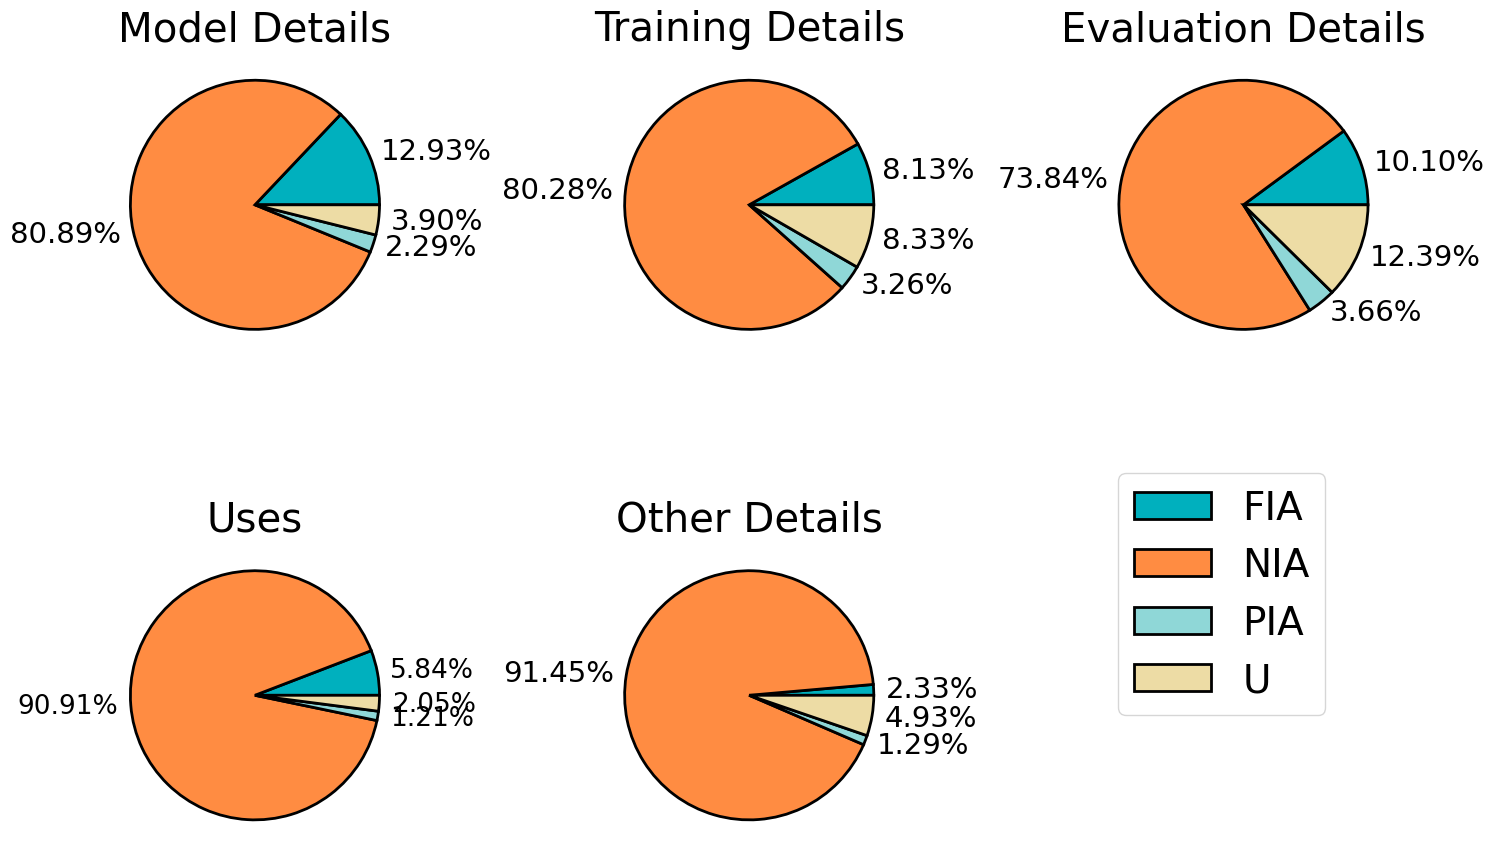

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
columns_to_drop = [1, 2, 6, 8, 9, 10, 13, 15, 22, 27, 29, 34, 35, 36, 37] ##This is written by manually checking the csv sheet

annotation_majorityvote=pd.read_csv('/home/vamsi.srivathsa/pritam.k/Combined_annotations/annotation_majority_vote_100_500 - final.csv')
annotation_majorityvote_mand = annotation_majorityvote.drop(annotation_majorityvote.columns[columns_to_drop], axis=1)

percentage_df = annotation_majorityvote_mand.T.apply(lambda x: x.value_counts(normalize=True) * 100)

## calculating the percentage of FIA, PIA, NIA, U for all models 
percentage_df=percentage_df.T
percentage_df.fillna(0, inplace=True)
percentage_df.drop(percentage_df.index[-1], inplace=True)

annotation_1_100=pd.read_csv("/home/vamsi.srivathsa/pritam.k/Combined_annotations/annotation-majorityvote_all - annotation_majorityvote.csv")

new_annotation_all=pd.concat([annotation_1_100,annotation_majorityvote],ignore_index=True)

split_indices = [12, 17, 22, 28]  ## written manually after checking the csv file 
divided_dfs = []

for i in range(len(split_indices) + 1):
    start_index = 0 if i == 0 else split_indices[i - 1]
    end_index = split_indices[i] if i < len(split_indices) else None
    selected_columns = new_annotation_all.columns[start_index:end_index]
    divided_df = new_annotation_all[selected_columns].copy()
    divided_dfs.append(divided_df)

divided_dfs[0]=divided_dfs[0].drop(columns=['Model Name'])
model_details_counts=divided_dfs[0].apply(lambda x: pd.Series(x).value_counts())
training_details_count=divided_dfs[1].apply(lambda x: pd.Series(x).value_counts())
evaluation_details_count=divided_dfs[2].apply(lambda x: pd.Series(x).value_counts())
uses_details_count=divided_dfs[3].apply(lambda x: pd.Series(x).value_counts())
other_details_count=divided_dfs[4].apply(lambda x: pd.Series(x).value_counts())


other_details_count['Total_counts']=other_details_count.sum(axis=1)
uses_details_count['Total_counts']=uses_details_count.sum(axis=1)
model_details_counts['Total_counts']=model_details_counts.sum(axis=1)
training_details_count['Total_counts']=training_details_count.sum(axis=1)
evaluation_details_count['Total_counts']=evaluation_details_count.sum(axis=1)

model_details_counts.index=['12.93%','80.89%','2.29%','3.90%']
training_details_count.index=['8.13%','80.28%','3.26%','8.33%']
evaluation_details_count.index=['10.10%','73.84%','3.66%','12.39%']
uses_details_count.index=['5.84%','90.91%','1.21%','2.05%']
other_details_count.index=['2.33%','91.45%','1.29%','4.93%']

#######3


## the below code is for plotting pie charts for each section 

k='Total_counts'

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)

colors=['#00b0be','#FF8C42','#8fd7d7','#eddca5']
# colors = ['#4B0082', '#9370DB', '#FFD700', '#FFA07A']

explode=(0,0,0,0.2)

# hatches= ['//', 'xx', '\\\\', '++']
hatches=['','','','']

model_details_counts.plot.pie(ax=ax1, y=k, colors=colors,hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True},title= 'Model Details',fontsize=21,textprops={'color' : 'black'})
training_details_count.plot.pie(ax=ax2, y=k, colors=colors,hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True}, title= 'Training Details', fontsize=21,textprops={'color':'black'})
evaluation_details_count.plot.pie(ax=ax3, y=k, colors=colors, hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True},title = 'Evaluation Details',  fontsize=21,textprops={'color':'black'})
uses_details_count.plot.pie(ax=ax4, y=k, colors=colors, hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True},title ='Uses', fontsize=19,textprops={'color':'black'})
other_details_count.plot.pie(ax=ax5, y=k, colors=colors, hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :2,'antialiased': True},title= 'Other Details',  fontsize=21, textprops={'color':'black'})

ax1.set_ylabel('')
ax1.set_title('Model Details', fontsize=29)
ax2.set_ylabel('')
ax2.set_title('Training Details', fontsize=29)
ax3.set_ylabel('')
ax3.set_title('Evaluation Details', fontsize=29)
ax4.set_title('Uses', fontsize=29)
ax5.set_title('Other Details', fontsize=29)
ax4.set_ylabel('')
ax5.set_ylabel('')
plt.tight_layout()
# plt.savefig("plots/manual_inspection_vbw2.pdf", dpi=300)
# plt.savefig("plots/manual_inspection_500.pdf", dpi=300)

ax1.legend(['FIA','NIA','PIA','U'], loc='lower right', bbox_to_anchor=(4, -1.2), prop={'size':28})
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax4.legend().set_visible(False)
ax5.legend().set_visible(False)


plt.show()


In [8]:
divided_dfs[0]

,Developed by,Funded by [optional],Shared by [optional],Model type,Language(s) (NLP),License,Finetuned from model [optional],Repository,Paper [optional],Demo [optional],Label Information
0,FIA,U,FIA,FIA,U,NIA,FIA,NIA,FIA,NIA,FIA
1,PIA,PIA,PIA,FIA,FIA,NIA,FIA,FIA,U,NIA,FIA
2,PIA,PIA,PIA,FIA,FIA,NIA,FIA,FIA,FIA,FIA,FIA
3,PIA,PIA,PIA,FIA,FIA,NIA,FIA,FIA,FIA,NIA,PIA
4,PIA,PIA,PIA,FIA,FIA,NIA,FIA,FIA,FIA,FIA,FIA
...,...,...,...,...,...,...,...,...,...,...,...
492,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA
493,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA
494,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA
495,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA,NIA


In [7]:
model_details_counts

,Developed by,Funded by [optional],Shared by [optional],Model type,Language(s) (NLP),License,Finetuned from model [optional],Repository,Paper [optional],Demo [optional],Label Information,Total_counts
FIA,15,NaN,11,124,110,48,265.0,31.0,33.0,3.0,67,707.0
NIA,443,463.0,452,333,337,443,197.0,455.0,449.0,491.0,359,4422.0
PIA,26,24.0,19,4,2,2,NaN,NaN,NaN,NaN,48,125.0
U,13,10.0,15,36,48,4,35.0,11.0,15.0,3.0,23,213.0


In [8]:
new_annotation_all.to_csv('/home/vamsi.srivathsa/pritam.k/sriman/annotation_500.csv')
new_annotation_all['Organisation']=new_annotation_all['Model Name'].str.split('/').str[0] 
# new_annotation_all.head()
organisation_df=new_annotation_all[['Model Name','Organisation']]
organisation_df.head()


,Model Name,Organisation
0,ProsusAI/finbert,ProsusAI
1,yiyanghkust/finbert-tone,yiyanghkust
2,cardiffnlp/twitter-roberta-base-sentiment-latest,cardiffnlp
3,cardiffnlp/twitter-xlm-roberta-base-sentiment,cardiffnlp
4,cardiffnlp/twitter-roberta-base-sentiment,cardiffnlp


In [38]:
import pandas as pd
annotation_all=pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/annotation_500.csv')
# annotation_all.tail()
annotation_all.drop(columns=['Unnamed: 0'],inplace=True)
annotation_all.head()
lp=annotation_all.columns.tolist()
print(len(lp))
lp
# annotation_all.head()

40


['Model Name',
 'Developed by',
 'Funded by [optional]',
 'Shared by [optional]',
 'Model type',
 'Language(s) (NLP)',
 'License',
 'Finetuned from model [optional]',
 'Repository',
 'Paper [optional]',
 'Demo [optional]',
 'Label Information',
 'Training Data',
 'Training Procedure',
 'Preprocessing [optional]',
 'Training Hyperparameters',
 'Speeds, Sizes, Times [optional]',
 'Testing Data',
 'Factors',
 'Metrics',
 'Results',
 'Summary',
 'Direct Use',
 'Downstream Use [optional]',
 'Out-of-Scope Use',
 'Bias, Risks, and Limitations',
 'Recommendations',
 'How to Get Started with the Model',
 'Model Examination [optional]',
 'Environmental Impact',
 'Technical Specifications [optional]',
 'Model Architecture and Objective',
 'Compute Infrastructure',
 'Hardware',
 'Software',
 'Citation [optional]',
 'Glossary [optional]',
 'More Information [optional]',
 'Model Card Authors [optional]',
 'Model Card Contact']

In [15]:
annotation_all.head()
value_counts = annotation_all['Training Data'].value_counts()

# Calculate the total number of rows
total_rows = len(annotation_all)

# Calculate the percentage of 'FIA' and 'PIA'
percentage_fia = (value_counts.get('FIA', 0) / total_rows) * 100
percentage_pia = (value_counts.get('PIA', 0) / total_rows) * 100

print(f"%FIA: {percentage_fia:.2f}%")
print(f"%PIA: {percentage_pia:.2f}%")

%FIA: 13.48%
%PIA: 2.01%


In [16]:
value_counts

Training Data
NIA    339
U       81
FIA     67
PIA     10
Name: count, dtype: int64

In [21]:
# new_annotation_all=pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/annotation_500.csv')
organisation_df.tail()
counts_org=organisation_df['Organisation'].value_counts()
# print(counts_org)
counts_org.describe()
counts_org.to_csv('/home/vamsi.srivathsa/pritam.k/sriman/organisation_counts.csv')

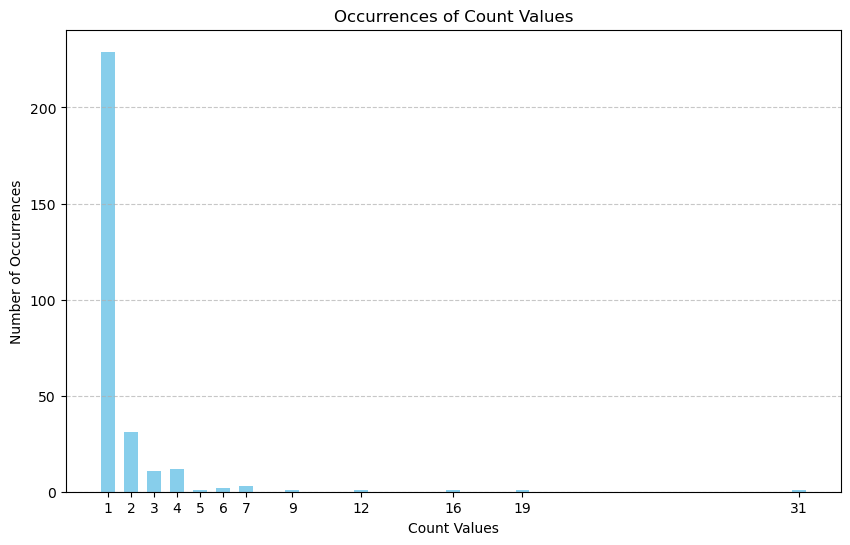

In [37]:
import matplotlib.pyplot as plt

# Get the organization counts
org_counts = organisation_df['Organisation'].value_counts().reset_index()
org_counts.columns = ['Organisation', 'Count']
count_occurrences = org_counts['Count'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(count_occurrences.index, count_occurrences.values, width=0.6, color='skyblue')
plt.xlabel('Count Values')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Count Values')
plt.xticks(count_occurrences.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
import pandas as pd

# Assuming your dataframe is named 'df'
df = new_annotation_all
split_indices = [12, 17, 22, 28]  ## written manually after checking the csv file 
divided_dfs = []

for i in range(len(split_indices) + 1):
    start_index = 0 if i == 0 else split_indices[i - 1]
    end_index = split_indices[i] if i < len(split_indices) else None
    selected_columns = new_annotation_all.columns[start_index:end_index]
    divided_df = new_annotation_all[selected_columns].copy()
    divided_dfs.append(divided_df)
# Define the list of unique values to check
unique_values = ['FIA', 'PIA', 'NIA', 'U']
model_name_column = divided_dfs[0]['Model Name']

# Insert 'Model Name' column into df2 at the first position
divided_dfs[4].insert(0, 'Model Name', model_name_column)
# Create a new dataframe to store the percentages
percentages_df = pd.DataFrame(columns=['Model Name', '%FIA', '%PIA', '%NIA', '%U'])

# Iterate over each row (model)
for _, row in divided_dfs[4].iterrows():
    model_name = row[0]  # Assuming the first column is the model name
    total_count = row[1:].count()  # Count of non-null values in the row
    
    # Calculate counts and percentages for each unique value
    row_data = [model_name]
    for value in unique_values:
        value_count = (row[1:] == value).sum()
        percentage = (value_count / total_count) * 100
        row_data.append(percentage)
    # Add the row data to the percentages dataframe
    percentages_df.loc[len(percentages_df)] = row_data

# Display the resulting dataframe
# print(percentages_df)
# perce
percentages_df

/tmp/ipykernel_23573/2405404433.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_name = row[0]  # Assuming the first column is the model name
/tmp/ipykernel_23573/2405404433.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_name = row[0]  # Assuming the first column is the model name
/tmp/ipykernel_23573/2405404433.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_name = row[0]  # Assuming the first colum

,Model Name,%FIA,%PIA,%NIA,%U
0,ProsusAI/finbert,8.333333,25.000000,58.333333,8.333333
1,yiyanghkust/finbert-tone,8.333333,8.333333,75.000000,8.333333
2,cardiffnlp/twitter-roberta-base-sentiment-latest,8.333333,25.000000,58.333333,8.333333
3,cardiffnlp/twitter-xlm-roberta-base-sentiment,8.333333,16.666667,75.000000,0.000000
4,cardiffnlp/twitter-roberta-base-sentiment,0.000000,0.000000,100.000000,0.000000
...,...,...,...,...,...
492,BeChi87/train_model_Lastest_16_8_lan3,0.000000,0.000000,100.000000,0.000000
493,madmancity/bert2,0.000000,0.000000,91.666667,8.333333
494,sasha/autotrain-RobertaBaseTweetEval-1281048986,0.000000,0.000000,91.666667,8.333333
495,yanezh/twiiter_try13_fold3,0.000000,0.000000,100.000000,0.000000


In [22]:
percentages_df.to_csv('/home/vamsi.srivathsa/pritam.k/sriman/percent_other_details.csv')

In [18]:
divided_dfs[3]

,Model Name,Direct Use,Downstream Use [optional],Out-of-Scope Use,"Bias, Risks, and Limitations",Recommendations,How to Get Started with the Model
0,ProsusAI/finbert,FIA,PIA,NIA,NIA,PIA,FIA
1,yiyanghkust/finbert-tone,U,PIA,NIA,PIA,PIA,FIA
2,cardiffnlp/twitter-roberta-base-sentiment-latest,U,PIA,NIA,NIA,NIA,FIA
3,cardiffnlp/twitter-xlm-roberta-base-sentiment,U,PIA,NIA,NIA,NIA,FIA
4,cardiffnlp/twitter-roberta-base-sentiment,NIA,NIA,NIA,NIA,NIA,FIA
...,...,...,...,...,...,...,...
492,BeChi87/train_model_Lastest_16_8_lan3,NIA,NIA,NIA,NIA,NIA,NIA
493,madmancity/bert2,NIA,NIA,NIA,NIA,NIA,FIA
494,sasha/autotrain-RobertaBaseTweetEval-1281048986,NIA,NIA,NIA,NIA,NIA,FIA
495,yanezh/twiiter_try13_fold3,NIA,NIA,NIA,NIA,NIA,NIA


In [47]:
perc_df=pd.read_csv("/home/vamsi.srivathsa/pritam.k/sriman/percentage_500.csv")
perc_df['Organisation']=perc_df['Model Name'].str.split('/').str[0] 
# perc_df=perc_df.groupby(['Model Name', 'Organisation'])
avg_columns = ['%FIA', '%PIA', '%NIA', '%U']
org_averages = perc_df.groupby('Organisation')[avg_columns].mean().add_suffix('_avg').reset_index()
org_stddevs = perc_df.groupby('Organisation')[avg_columns].std().add_suffix('_std').reset_index()
# Merge the averages back into the original DataFrame
perc_df = perc_df.merge(org_averages, on='Organisation', how='left')
perc_df=perc_df.merge(org_counts,on="Organisation",how='left')
perc_df=perc_df.merge(org_stddevs,on="Organisation",how="left")
perc_df=perc_df.sort_values(by="Count",ascending=False)
perc_df = perc_df[perc_df['Count'] != 1]
perc_df.to_csv("/home/vamsi.srivathsa/pritam.k/sriman/percentage_500_organisations.csv")

perc_df.head()

,Model Name,%FIA,%PIA,%NIA,%U,Organisation,%FIA_avg,%PIA_avg,%NIA_avg,%U_avg,Count,%FIA_std,%PIA_std,%NIA_std,%U_std
294,cardiffnlp/mbert-base-tweet-sentiment-it,7.692308,0.000000,84.615385,7.692308,cardiffnlp,9.842845,4.052936,80.06617,6.038048,31,6.722214,9.657156,15.034618,6.194608
129,cardiffnlp/bertweet-base-sentiment,0.000000,0.000000,97.435897,2.564103,cardiffnlp,9.842845,4.052936,80.06617,6.038048,31,6.722214,9.657156,15.034618,6.194608
180,cardiffnlp/xlm-roberta-base-tweet-sentiment-it,5.128205,0.000000,92.307692,2.564103,cardiffnlp,9.842845,4.052936,80.06617,6.038048,31,6.722214,9.657156,15.034618,6.194608
23,cardiffnlp/twitter-xlm-roberta-base-sentiment-...,17.948718,5.128205,74.358974,2.564103,cardiffnlp,9.842845,4.052936,80.06617,6.038048,31,6.722214,9.657156,15.034618,6.194608
173,cardiffnlp/bert-base-multilingual-cased-sentim...,7.692308,0.000000,87.179487,5.128205,cardiffnlp,9.842845,4.052936,80.06617,6.038048,31,6.722214,9.657156,15.034618,6.194608


In [48]:
correlation = perc_df['%NIA_std'].corr(perc_df['Count'])

# Display the correlation
print(f"Correlation between %NIA and Count: {correlation}")

Correlation between %NIA and Count: 0.3942140297331821


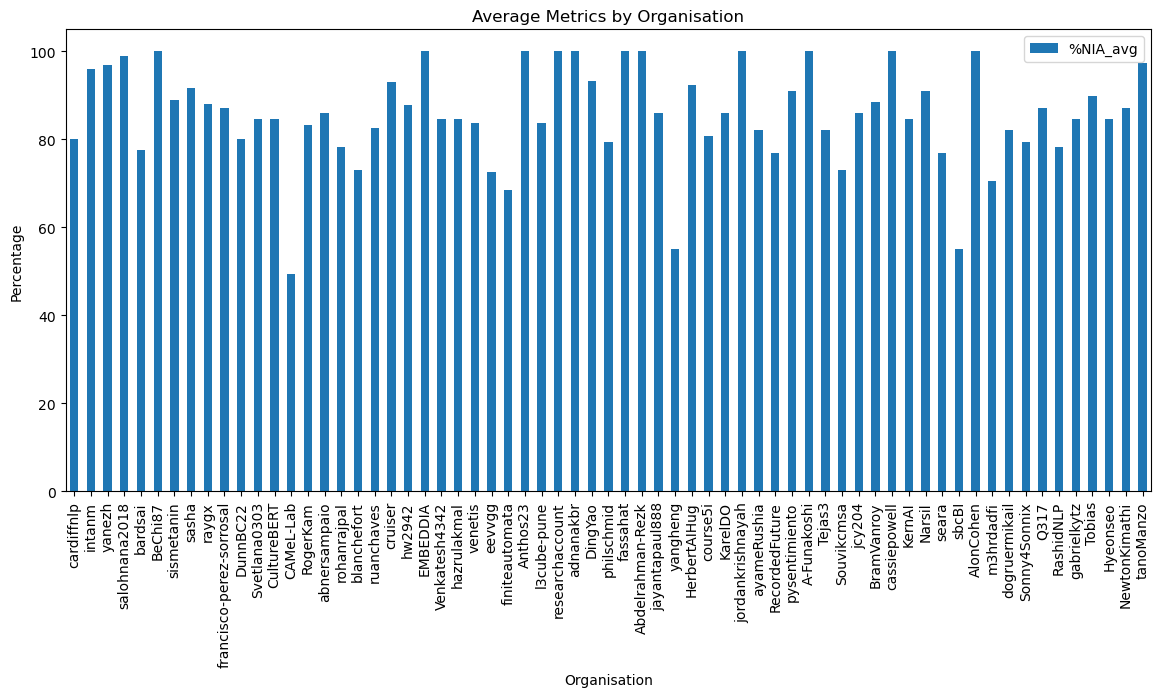

In [51]:
avg_df = perc_df[['Organisation','%NIA_avg']].drop_duplicates()
avg_df.set_index('Organisation').plot(kind='bar', figsize=(14, 6))
plt.ylabel('Percentage')
plt.title('Average Metrics by Organisation')
plt.show()

In [32]:
perc_df

,Model Name,%FIA,%PIA,%NIA,%U,Organisation
0,ProsusAI/finbert,25.641026,30.769231,30.769231,12.820513,ProsusAI
1,yiyanghkust/finbert-tone,20.512821,38.461538,33.333333,7.692308,yiyanghkust
2,cardiffnlp/twitter-roberta-base-sentiment-latest,23.076923,38.461538,33.333333,5.128205,cardiffnlp
3,cardiffnlp/twitter-xlm-roberta-base-sentiment,20.512821,38.461538,38.461538,2.564103,cardiffnlp
4,cardiffnlp/twitter-roberta-base-sentiment,23.076923,7.692308,69.230769,0.000000,cardiffnlp
...,...,...,...,...,...,...
492,BeChi87/train_model_Lastest_16_8_lan3,0.000000,0.000000,100.000000,0.000000,BeChi87
493,madmancity/bert2,5.128205,0.000000,92.307692,2.564103,madmancity
494,sasha/autotrain-RobertaBaseTweetEval-1281048986,5.128205,0.000000,92.307692,2.564103,sasha
495,yanezh/twiiter_try13_fold3,0.000000,0.000000,100.000000,0.000000,yanezh


In [4]:

model_details_counts.index=['FIA','NIA','PIA','U']
training_details_count.index=['FIA','NIA','PIA','U']
evaluation_details_count.index=['FIA','NIA','PIA','U']
uses_details_count.index=['FIA','NIA','PIA','U']
other_details_count.index=['FIA','NIA','PIA','U']

In [5]:
model_details_counts

,Developed by,Funded by [optional],Shared by [optional],Model type,Language(s) (NLP),License,Finetuned from model [optional],Repository,Paper [optional],Demo [optional],Label Information,Total_counts
FIA,15,NaN,11,124,110,48,265.0,31.0,33.0,3.0,67,707.0
NIA,443,463.0,452,333,337,443,197.0,455.0,449.0,491.0,359,4422.0
PIA,26,24.0,19,4,2,2,NaN,NaN,NaN,NaN,48,125.0
U,13,10.0,15,36,48,4,35.0,11.0,15.0,3.0,23,213.0


In [4]:

import numpy as np
model_details_counts_mand=model_details_counts.T
rows_del=[1,2,6,8,9,10,11]
model_details_counts_mand=model_details_counts_mand.drop(model_details_counts_mand.index[rows_del])

training_details_count_mand=training_details_count.T
rows_del=[2,4,5]
training_details_count_mand=training_details_count_mand.drop(training_details_count_mand.index[rows_del])

evaluation_details_count_mand=evaluation_details_count.T
rows_del=[5]
evaluation_details_count_mand=evaluation_details_count_mand.drop(evaluation_details_count_mand.index[rows_del])

uses_details_count_mand=uses_details_count.T
rows_del=[1,6]
uses_details_count_mand=uses_details_count_mand.drop(uses_details_count_mand.index[rows_del])

other_details_count_mand=other_details_count.T
rows_del=[0,2,7,8,9,10,12]
other_details_count_mand=other_details_count_mand.drop(other_details_count_mand.index[rows_del])

merged_details_mand=pd.concat([model_details_counts_mand,training_details_count_mand,evaluation_details_count_mand,uses_details_count_mand,other_details_count_mand], ignore_index=False)
merged_details_mand=merged_details_mand.T
merged_details_mand=merged_details_mand.drop(columns=['Total_counts'])
merged_details_mand=merged_details_mand.T

merged_details_mand.fillna(0, inplace=True)
row_names=merged_details_mand.index.tolist()
y_FIA = merged_details_mand['FIA'].tolist()
y_NIA = merged_details_mand['NIA'].tolist()
y_PIA = merged_details_mand['PIA'].tolist()
y_U = merged_details_mand['U'].tolist()

# colors=['white']*5
# colors=['#4a2377','#f55f74','#0d7d87','#8cc5e3']
colors=['#00b0be','#FF8C42','#8fd7d7','#eddca5']


y_FIA=np.array(y_FIA)
y_NIA=np.array(y_NIA)
y_PIA=np.array(y_PIA)
y_U=np.array(y_U)

fig = plt.figure(figsize=(12, 5))
hatches=['','','','']

# hatches= ['///', 'xxx', '\\\\\\', '+++']
bar_width=0.6
totals = y_FIA + y_NIA + y_PIA + y_U

# Normalize each component to percentages
y_FIA_pct = y_FIA / totals * 100
y_NIA_pct = y_NIA / totals * 100
y_PIA_pct = y_PIA / totals * 100
y_U_pct = y_U / totals * 100

plt.bar(row_names, y_FIA_pct, hatch=hatches[0], color=colors[0], edgecolor='black', width=bar_width)
plt.bar(row_names, y_NIA_pct, bottom=y_FIA_pct, hatch=hatches[1], color=colors[1], edgecolor='black', width=bar_width)
plt.bar(row_names, y_PIA_pct, bottom=y_FIA_pct + y_NIA_pct, hatch=hatches[2], color=colors[2], edgecolor='black', width=bar_width)
plt.bar(row_names, y_U_pct, bottom=y_FIA_pct + y_PIA_pct + y_NIA_pct, hatch=hatches[3], color=colors[3], edgecolor='black', width=bar_width)

plt.ylabel('Percentage', fontsize=14)
plt.legend(['FIA', 'NIA', 'PIA', 'U'], bbox_to_anchor=(0.5, -1.2), loc="upper center", ncol=4, prop={'size': 22})
plt.tight_layout()
plt.xticks(rotation='vertical', fontsize=14)
plt.xlim(-0.5, len(row_names) - 0.5)
plt.show()

KeyError: "['Total_counts'] not found in axis"

In [22]:

total=merged_details_mand['NIA']+merged_details_mand['FIA']+merged_details_mand['PIA']+merged_details_mand['U']

merged_details_mand['NIA_per']=(merged_details_mand['NIA'])/total * 100
merged_details_mand['FIA_per']=(merged_details_mand['FIA'])/total * 100
merged_details_mand['PIA_per']=(merged_details_mand['PIA'])/total * 100
merged_details_mand['U_per']=(merged_details_mand['U'])/total * 100



In [23]:
merged_details_mand

,FIA,NIA,PIA,U,NIA_per,FIA_per,PIA_per,U_per
Developed by,15.0,443.0,26.0,13.0,89.134809,3.018109,5.231388,2.615694
Model type,124.0,333.0,4.0,36.0,67.002012,24.949698,0.804829,7.243461
Language(s) (NLP),110.0,337.0,2.0,48.0,67.806841,22.132797,0.402414,9.657948
License,48.0,443.0,2.0,4.0,89.134809,9.657948,0.402414,0.804829
Repository,31.0,455.0,0.0,11.0,91.549296,6.237425,0.000000,2.213280
Training Data,67.0,339.0,10.0,81.0,68.209256,13.480885,2.012072,16.297787
Training Procedure,6.0,424.0,24.0,43.0,85.311871,1.207243,4.828974,8.651911
Training Hyperparameters,121.0,294.0,20.0,62.0,59.154930,24.346076,4.024145,12.474849
Testing Data,19.0,415.0,16.0,47.0,83.501006,3.822938,3.219316,9.456740
Factors,2.0,467.0,13.0,15.0,93.963783,0.402414,2.615694,3.018109


In [79]:
model_details_counts

,Developed by,Funded by [optional],Shared by [optional],Model type,Language(s) (NLP),License,Finetuned from model [optional],Repository,Paper [optional],Demo [optional],Label Information,Total_counts
FIA,15,NaN,11,124,110,48,265.0,31.0,33.0,3.0,67,707.0
NIA,443,463.0,452,333,337,443,197.0,455.0,449.0,491.0,359,4422.0
PIA,26,24.0,19,4,2,2,NaN,NaN,NaN,NaN,48,125.0
U,13,10.0,15,36,48,4,35.0,11.0,15.0,3.0,23,213.0


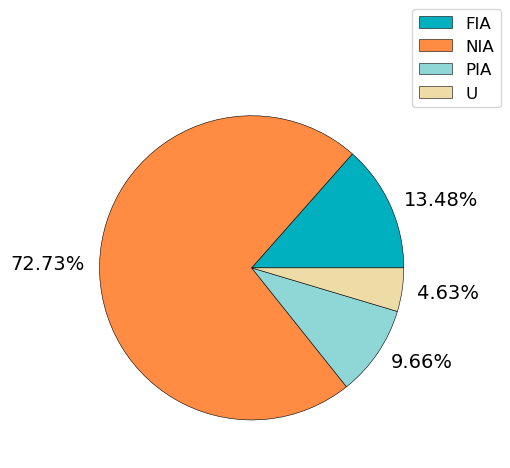

In [10]:
## the below code is used to plot the label information

y=model_details_counts['Label Information']
y=y.dropna()

# colors=['white']*4
# colors=['#4a2377','#f55f74','#0d7d87','#8cc5e3']
colors=['#00b0be','#FF8C42','#8fd7d7','#eddca5']


# hatches= ['//', 'xx', '\\\\','++']
hatches=['','','','']


y.plot.pie(colors=colors, hatch=hatches, wedgeprops={'edgecolor':'black','linewidth' :0.4,'antialiased': True},  textprops={'color':'black'} ,labels=['13.48%','72.73%','9.66%','4.63%'], fontsize=14)
plt.ylabel('')
plt.legend(labels=['FIA', 'NIA', 'PIA','U'], bbox_to_anchor=(0.9, 0.9), loc='lower left', prop={'size':12})
plt.tight_layout()
# plt.savefig("plots/label_pie_vbw2.pdf", dpi=300)
plt.savefig('label_info.pdf', dpi=300, bbox_inches='tight')
plt.show()



PLOT FOR DIFFERENCES in REPORTED scores

In [4]:
# import os
# import shutil

# src_dir_1 = "/home/vamsi.srivathsa/pritam.k/hf_audit/model_card_results"
# src_dir_2 = "/home/vamsi.srivathsa/pritam.k/hf_audit/model_card_results_p2"
# dest_dir = "/home/vamsi.srivathsa/pritam.k/hf_audit/model_card_results_combined"

# os.makedirs(dest_dir, exist_ok=True)

# for dataset in ["tweet_eval","financial_phrasebank", "amazon_multi_reviews"]:
#     dest_dataset_dir = os.path.join(dest_dir, dataset)
#     os.makedirs(dest_dataset_dir, exist_ok=True)

#     # dest_before_dir = os.path.join(dest_dataset_dir, "after")
#     # os.makedirs(dest_before_dir, exist_ok=True)

#     # for difficulty in ["easy", "ambi", "hard"]:
#     # dest_difficulty_dir = os.path.join(dest_before_dir, difficulty)
#     # os.makedirs(dest_difficulty_dir, exist_ok=True)

#     src_difficulty_dir_1 = os.path.join(src_dir_1, dataset)
#     for filename in os.listdir(src_difficulty_dir_1):
#         src_file = os.path.join(src_difficulty_dir_1, filename)
#         dest_file = os.path.join(dest_dataset_dir, filename)
#         shutil.copy(src_file, dest_file)

#     src_difficulty_dir_2 = os.path.join(src_dir_2, dataset)
#     for filename in os.listdir(src_difficulty_dir_2):
#         src_file = os.path.join(src_difficulty_dir_2, filename)
#         dest_file = os.path.join(dest_dataset_dir, filename)
#         shutil.copy(src_file, dest_file)

In [12]:
import pandas as pd
import os
import json

df_models_100=pd.read_csv('/home/vamsi.srivathsa/pritam.k/hf_audit/data/models.csv')
df_models_400=pd.read_csv('/home/vamsi.srivathsa/pritam.k/hf_audit/data/models_combined.csv')

df_models=pd.concat([df_models_100, df_models_400], ignore_index=True)

df_sc_fil_100=pd.read_csv('/home/vamsi.srivathsa/pritam.k/hf_audit/data/reported_scores_m100_filtered.csv')
df_sc_fil_400=pd.read_csv('/home/vamsi.srivathsa/pritam.k/hf_audit/data/df_reported_scores_400models_filtered.csv')

df_sc_fil=pd.concat([df_sc_fil_100,df_sc_fil_400], ignore_index=True)

def getScoresDF(dataset):
    
    path=f"/home/vamsi.srivathsa/pritam.k/hf_audit/model_card_results_combined/{dataset}/"

    easy_cart_fnames = os.listdir(path)

    data=[]
    for fname in df_models.model:
        tname = fname.replace("/", "_")
        final_name = tname+'_scores.json'
        if final_name in easy_cart_fnames:
            with open(path+final_name, "r") as jfile:
                score_data = json.load(jfile)
                score_data["model"] = fname
                data.append(score_data)

    sc_df = pd.DataFrame(data)
    merged_df = pd.merge(sc_df, df_sc_fil, on='model', how='inner')

    return merged_df

scores_df_te = getScoresDF("tweet_eval")
scores_df_amr = getScoresDF("amazon_multi_reviews")
scores_df_fp = getScoresDF("financial_phrasebank")

mdf = pd.merge(scores_df_te[['model', 'f1']], scores_df_amr[['model', 'f1']], on='model', how='inner')
mdf_1 = pd.merge(mdf, scores_df_fp[['model', 'f1']], on='model', how='inner')
mdf_2 = pd.merge(mdf_1, df_sc_fil, on='model', how='inner')
mdf_3 = mdf_2.rename(columns={'f1_x': 'empirical_te', 'macro_f1': 'reported_f1', 'f1_y': 'empirical_amr', 'f1': 'empirical_fp'})

# mdf_3.loc[:, 'diff_te'] = mdf_3['reported_f1'] - mdf_3['empirical_te']
# mdf_3.loc[:, 'diff_amr'] = mdf_3['reported_f1'] - mdf_3['empirical_amr']
# mdf_3.loc[:, 'diff_fp'] = mdf_3['reported_f1'] - mdf_3['empirical_fp']

# mdf_4 = pd.merge(df_sc['model'], mdf_3, on='model', how='left')
# mdf_4['mname'] = ['M'+str(i) for i in range(1, 500)]

# mdf_3.head()
# mdf_3.tail()


In [5]:
# scores_df_te.tail() ##186
# scores_df_amr.tail() ##184
# scores_df_fp.tail() ##185

,accuracy,f1,precision,recall,total_time_in_seconds,samples_per_second,latency_in_seconds,model,macro_f1
180,0.487206,0.271621,0.252450,0.294221,114.130415,42.460198,0.023551,yanezh/twiiter_try15_fold2,0.986
181,0.606067,0.301806,0.669635,0.360018,114.512679,42.318458,0.023630,intanm/mlm_v1_20230327_fin_sa_70,0.742
182,0.659926,0.558744,0.677175,0.523421,67.080068,72.242026,0.013842,sasha/autotrain-DistilBERT-TweetEval-1281148992,0.606
183,0.559018,0.420294,0.569437,0.418172,114.524896,42.313944,0.023633,madmancity/bert2,0.527
184,0.652084,0.443068,0.711528,0.442895,115.362180,42.006834,0.023806,sasha/autotrain-RobertaBaseTweetEval-1281048986,0.592


In [6]:
mdf_3.to_csv('/home/vamsi.srivathsa/pritam.k/sriman/temp.csv',index=False)

In [12]:
import pandas as pd
mdf_3=pd.read_csv('/home/vamsi.srivathsa/pritam.k/sriman/temp.csv')

In [13]:
mdf_3.head()

,model,empirical_te,empirical_amr,empirical_fp,reported_f1
0,ProsusAI/finbert,0.367876,0.420965,0.882533,0.8400
1,cardiffnlp/twitter-xlm-roberta-base-sentiment,0.682772,0.597402,0.515320,0.6689
2,finiteautomata/beto-sentiment-analysis,0.460780,0.498206,0.359941,0.6720
3,HooshvareLab/bert-fa-base-uncased-sentiment-di...,0.207078,0.238938,0.165935,0.8172
4,ahmedrachid/FinancialBERT-Sentiment-Analysis,0.354997,0.353014,0.952734,0.9800


In [14]:
mdf_3['Organisation']=mdf_3['model'].str.split('/').str[0] 
mdf_3.head()

,model,empirical_te,empirical_amr,empirical_fp,reported_f1,Organisation
0,ProsusAI/finbert,0.367876,0.420965,0.882533,0.8400,ProsusAI
1,cardiffnlp/twitter-xlm-roberta-base-sentiment,0.682772,0.597402,0.515320,0.6689,cardiffnlp
2,finiteautomata/beto-sentiment-analysis,0.460780,0.498206,0.359941,0.6720,finiteautomata
3,HooshvareLab/bert-fa-base-uncased-sentiment-di...,0.207078,0.238938,0.165935,0.8172,HooshvareLab
4,ahmedrachid/FinancialBERT-Sentiment-Analysis,0.354997,0.353014,0.952734,0.9800,ahmedrachid


In [15]:
mdf_3.loc[:, 'diff_te'] = mdf_3['reported_f1'] - mdf_3['empirical_te']
mdf_3.loc[:, 'diff_amr'] = mdf_3['reported_f1'] - mdf_3['empirical_amr']
mdf_3.loc[:, 'diff_fp'] = mdf_3['reported_f1'] - mdf_3['empirical_fp']

mdf_3.head()

,model,empirical_te,empirical_amr,empirical_fp,reported_f1,Organisation,diff_te,diff_amr,diff_fp
0,ProsusAI/finbert,0.367876,0.420965,0.882533,0.8400,ProsusAI,0.472124,0.419035,-0.042533
1,cardiffnlp/twitter-xlm-roberta-base-sentiment,0.682772,0.597402,0.515320,0.6689,cardiffnlp,-0.013872,0.071498,0.153580
2,finiteautomata/beto-sentiment-analysis,0.460780,0.498206,0.359941,0.6720,finiteautomata,0.211220,0.173794,0.312059
3,HooshvareLab/bert-fa-base-uncased-sentiment-di...,0.207078,0.238938,0.165935,0.8172,HooshvareLab,0.610122,0.578262,0.651265
4,ahmedrachid/FinancialBERT-Sentiment-Analysis,0.354997,0.353014,0.952734,0.9800,ahmedrachid,0.625003,0.626986,0.027266


In [16]:
mdf_3['mname'] = ['M'+str(i) for i in range(1, 183)]

mdf_final=mdf_3[['mname','Organisation','diff_te', 'diff_amr', 'diff_fp']]

mdf_final.head()

,mname,Organisation,diff_te,diff_amr,diff_fp
0,M1,ProsusAI,0.472124,0.419035,-0.042533
1,M2,cardiffnlp,-0.013872,0.071498,0.153580
2,M3,finiteautomata,0.211220,0.173794,0.312059
3,M4,HooshvareLab,0.610122,0.578262,0.651265
4,M5,ahmedrachid,0.625003,0.626986,0.027266


In [17]:
mdf_final.head()

,mname,Organisation,diff_te,diff_amr,diff_fp
0,M1,ProsusAI,0.472124,0.419035,-0.042533
1,M2,cardiffnlp,-0.013872,0.071498,0.153580
2,M3,finiteautomata,0.211220,0.173794,0.312059
3,M4,HooshvareLab,0.610122,0.578262,0.651265
4,M5,ahmedrachid,0.625003,0.626986,0.027266


In [12]:
org_counts = mdf_final['Organisation'].value_counts().reset_index()
org_counts.columns = ['Organisation', 'Count']
count_occurrences = org_counts['Count'].value_counts().sort_index()
org_counts.to_csv('/home/vamsi.srivathsa/pritam.k/sriman/org_count_scores.csv')

In [13]:
print(((500-182)/500))

0.636


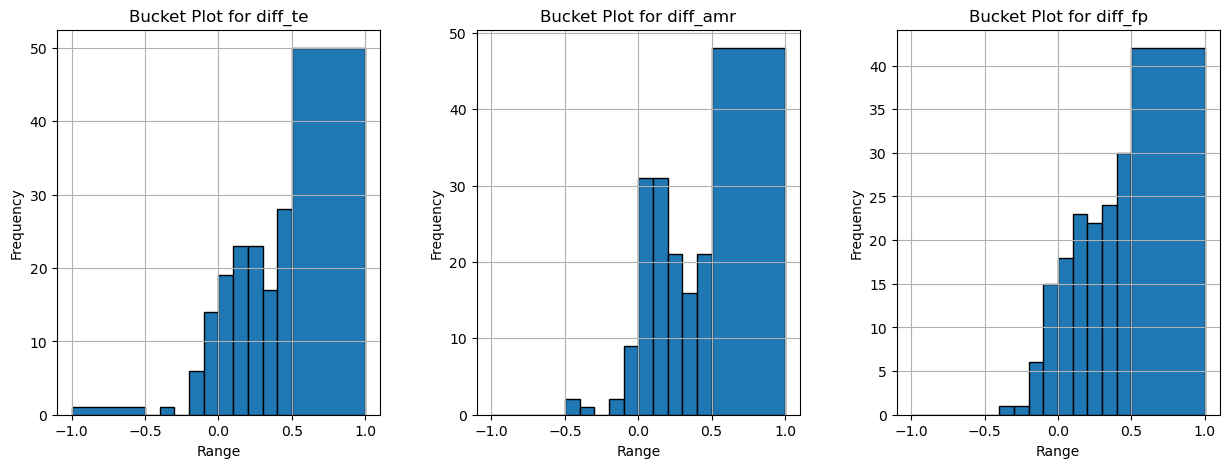

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
df = mdf_final

# Define the range for the bins
bins = [-1.0, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]

# Create a figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the bucket plots for each column
cols = ['diff_te', 'diff_amr', 'diff_fp']
for i, col in enumerate(cols):
    df[col].hist(bins=bins, ax=axs[i], edgecolor='black')
    axs[i].set_title(f'Bucket Plot for {col}')
    axs[i].set_xlabel('Range')
    axs[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()

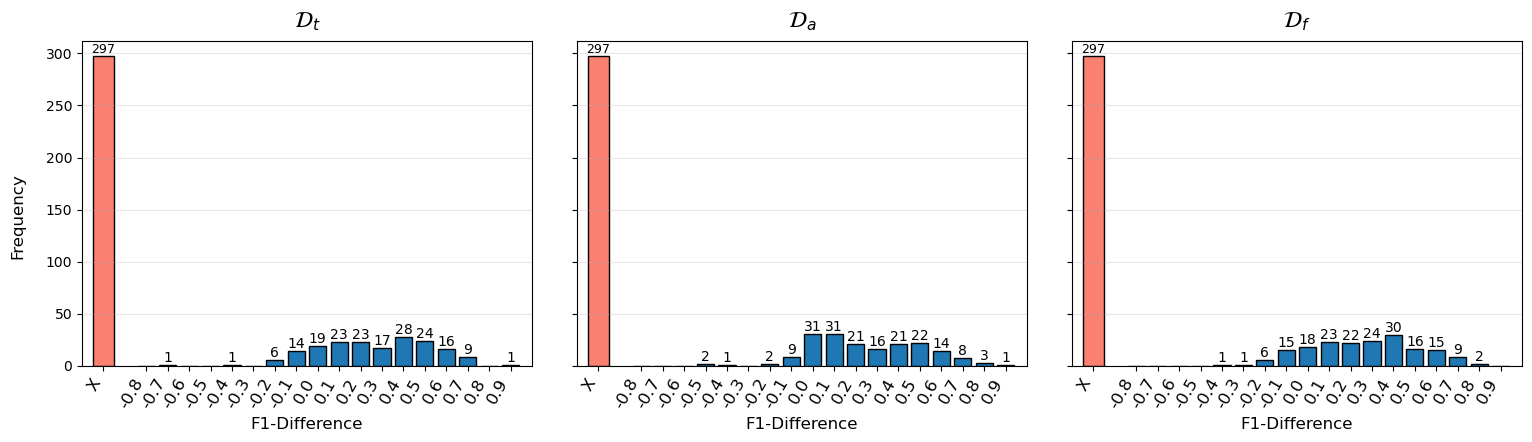

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'
df = mdf_final

# Define the range for the bins
bins = np.arange(-0.8, 1.1, 0.1)  # From -0.8 to 1.0 with 0.1 steps

# Create a figure and subplots with shared y-axis
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

# Initialize variables to store the maximum count
max_count = 0

# First pass: calculate the maximum count across all columns
cols = ['diff_te', 'diff_amr', 'diff_fp']
extra_counts = [297, 297, 297]  # Extra counts to add at the beginning of each subplot

for col, extra_count in zip(cols, extra_counts):
    counts, _ = np.histogram(df[col], bins=bins)
    max_count = max(max_count, counts.max(), extra_count)

# Set the y-axis limit for all subplots
max_count = max_count * 1.1  # Adding 10% buffer for better visibility
fig.text(0.06, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=12)

# Second pass: plot the bucket plots for each column
for i, (col, extra_count) in enumerate(zip(cols, extra_counts)):
    counts, edges, bars = axs[i].hist(df[col], bins=bins, edgecolor='black', rwidth=0.8)
    
    # Add the extra bar at the beginning with salmon red color
    extra_bar = axs[i].bar(edges[0] - 0.15, extra_count, width=0.1, edgecolor='black', color='salmon')
    
    axs[i].set_xlabel('F1-Difference', fontsize=12)
    
    # Set x-axis labels with more spread, without the extra space at the end
    bin_centers = (edges[:-1] + edges[1:]) / 2
    all_centers = [edges[0] - 0.15] + list(bin_centers)  # Include the extra bar's center
    axs[i].set_xticks(all_centers)
    
    # Create labels for x-axis, without the extra empty label at the end
    labels = ['X'] + [f'{x:.1f}' for x in bin_centers]
    axs[i].set_xticklabels(labels, rotation=60, ha='right', fontsize=12)
    
    # Extend the x-axis range to accommodate the spread
    axs[i].set_xlim(edges[0] - 0.25, edges[-1] + 0.05)  # Reduced right margin
    
    # Add grid lines for better readability
    axs[i].grid(axis='y', alpha=0.3)
    
    # Add value labels on top of each bar
    for j, count in enumerate(counts):
        if count > 0:  # Only add label if count is greater than 0
            axs[i].text(bars[j].get_x() + bars[j].get_width() / 2., count, 
                       f'{int(count)}', ha='center', va='bottom', fontsize=10)
    
    # Add label for the extra bar
    axs[i].text(extra_bar[0].get_x() + extra_bar[0].get_width() / 2., extra_count, 
               f'{extra_count}', ha='center', va='bottom', fontsize=9)

# Add LaTeX-style titles above each subplot
titles = [r'$\mathcal{D}_t$', r'$\mathcal{D}_a$', r'$\mathcal{D}_f$']
for ax, title in zip(axs, titles):
    ax.set_title(title, fontsize=16, pad=10, fontweight='bold')

# Adjust the spacing between subplots and layout
plt.subplots_adjust(wspace=0.1, bottom=0.2, top=0.85, left=0.1)
plt.savefig('f1_difference_plot.pdf', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

In [19]:
plt.savefig('f1_difference_plot.pdf', dpi=300)

<Figure size 640x480 with 0 Axes>